In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

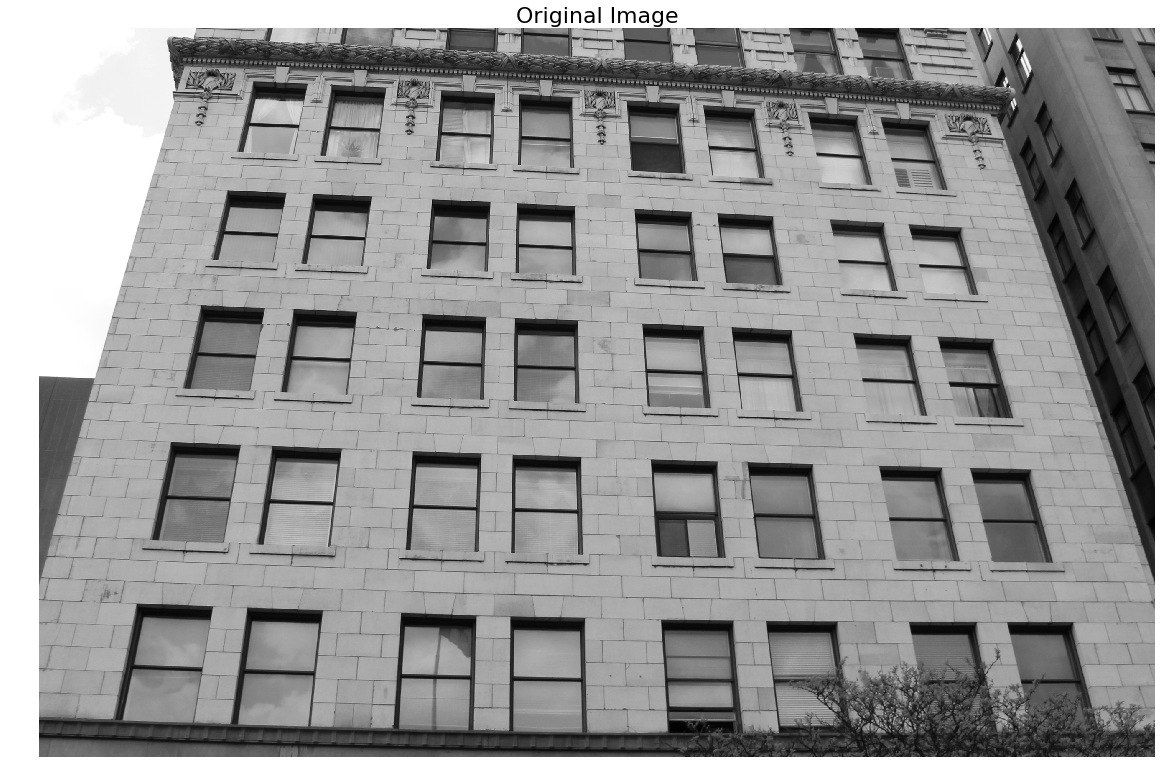

In [5]:
img = cv2.imread("building1.png",0)

plt.figure(figsize=(20,20))

plt.title('Original Image',fontsize=22)
plt.axis("off")
plt.imshow(img,'gray')


plt.show()

### Point Detection

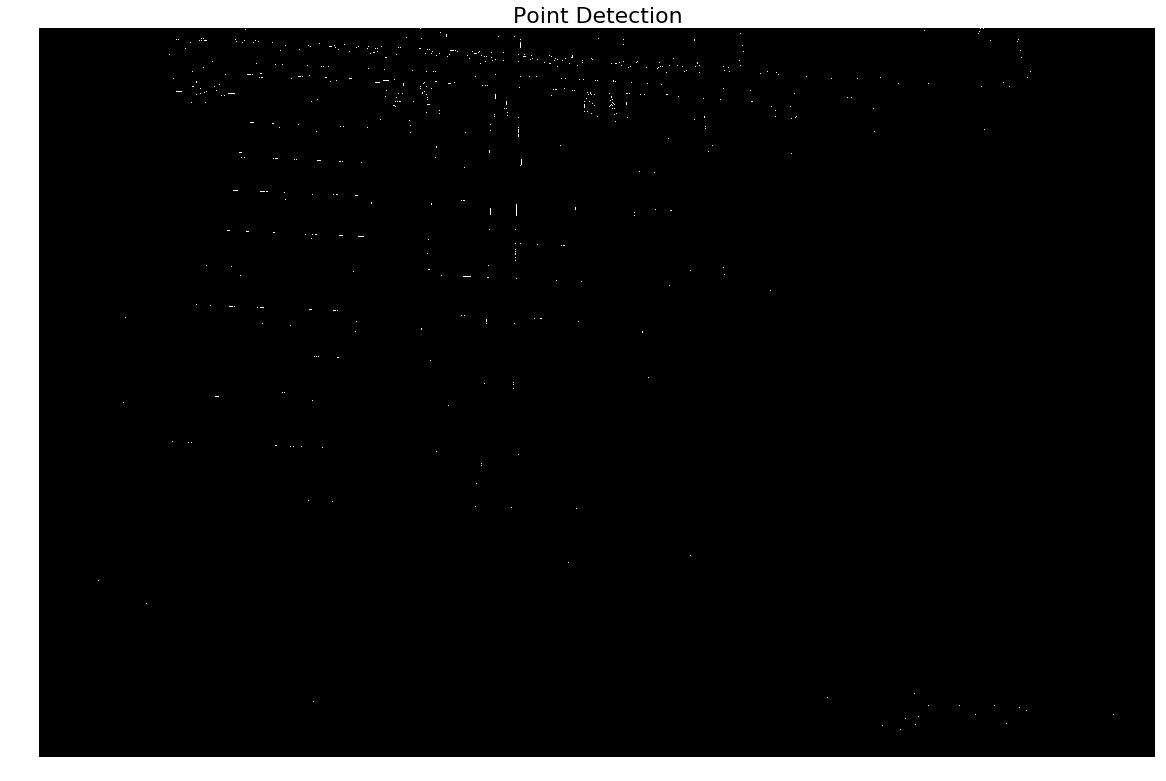

In [46]:
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
img_point = cv2.filter2D(img,-1,kernel)

t = 150

mask_point = (np.abs(img_point) > t)
img_point[mask_point] = 255
img_point[~mask_point] = 0

plt.figure(figsize=(20,20))

plt.title('Point Detection',fontsize=22)
plt.axis("off")
plt.imshow(img_point,'gray')

plt.show()

### Line Detection

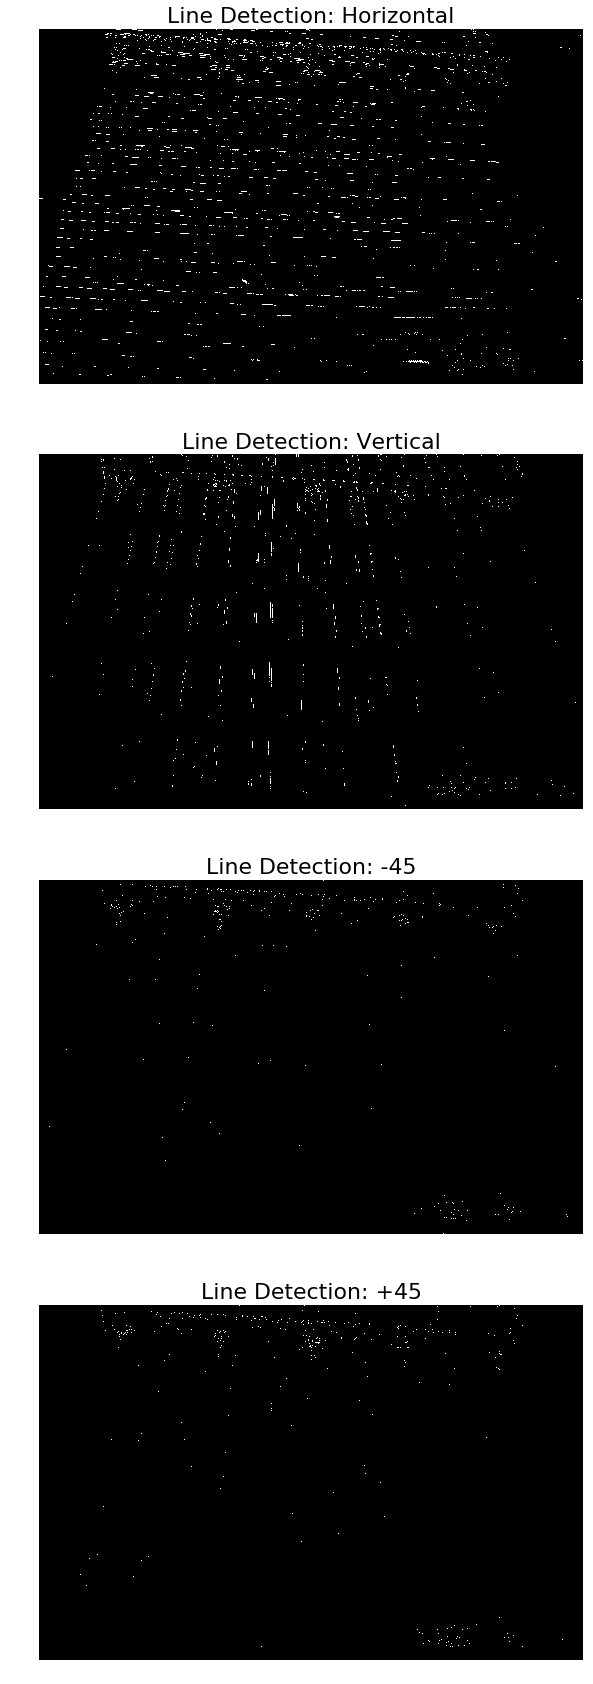

In [41]:
kernelH = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
kernelV = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
kernel45_neg = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
kernel45_pos = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])

t = 50

img_pointH = cv2.filter2D(img,-1,kernelH)
img_pointH_mask = (np.abs(img_pointH) > t)
img_pointH[img_pointH_mask] = 255
img_pointH[~img_pointH_mask] = 0

img_pointV = cv2.filter2D(img,-1,kernelV)
img_pointV_mask = (np.abs(img_pointV) > t)
img_pointV[img_pointV_mask] = 255
img_pointV[~img_pointV_mask] = 0

img_point45_neg = cv2.filter2D(img,-1,kernel45_neg)
img_point45_neg_mask = (np.abs(img_point45_neg) > t)
img_point45_neg[img_point45_neg_mask] = 255
img_point45_neg[~img_point45_neg_mask] = 0

img_point45_pos = cv2.filter2D(img,-1,kernel45_pos)
img_point45_pos_mask = (np.abs(img_point45_pos) > t)
img_point45_pos[img_point45_pos_mask] = 255
img_point45_pos[~img_point45_pos_mask] = 0


plt.figure(figsize=(30,30))

plt.subplot(4,1,1)
plt.title('Line Detection: Horizontal',fontsize=22)
plt.axis("off")
plt.imshow(img_pointH,'gray')

plt.subplot(4,1,2)
plt.title('Line Detection: Vertical',fontsize=22)
plt.axis("off")
plt.imshow(img_pointV,'gray')

plt.subplot(4,1,3)
plt.title('Line Detection: -45',fontsize=22)
plt.axis("off")
plt.imshow(img_point45_neg,'gray')

plt.subplot(4,1,4)
plt.title('Line Detection: +45',fontsize=22)
plt.axis("off")
plt.imshow(img_point45_pos,'gray')


plt.show()

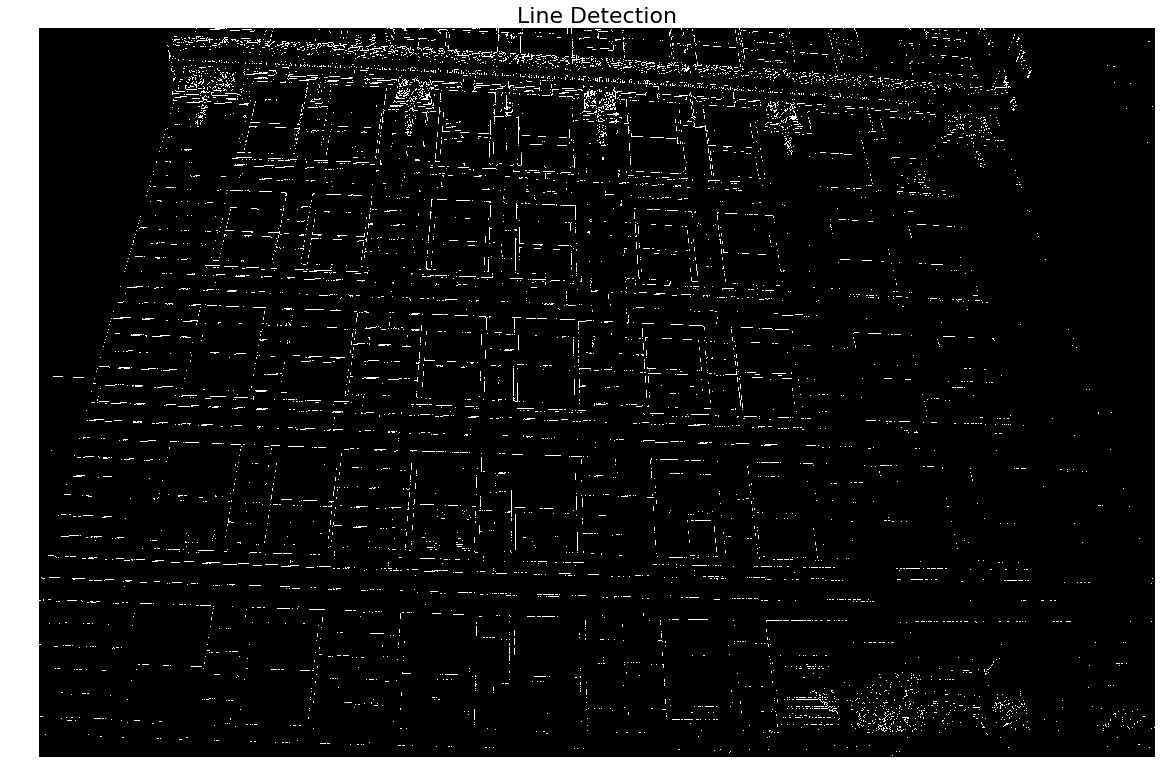

In [52]:
img_line = img_pointH+img_pointV+img_point45_neg+img_point45_pos

plt.figure(figsize=(20,20))
plt.title('Line Detection',fontsize=22)
plt.axis("off")
plt.imshow(img_line,'gray')


plt.show()